In [3]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [4]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy.special import gamma
from scipy.stats import norm

<IPython.core.display.Javascript object>

# 1/

In [5]:
d1 = np.matrix([1, 2, 3]).transpose()
d2 = np.matrix([-1, 0, 0]).transpose()
d3 = np.matrix([-4, 4, 2]).transpose()

<IPython.core.display.Javascript object>

In [6]:
D = np.concatenate((d1, d2, d3), axis=1)

<IPython.core.display.Javascript object>

In [7]:
mu = np.mean(D, axis=1)
print("expected = " + str(mu))

expected = [[-1.33333333]
 [ 2.        ]
 [ 1.66666667]]


<IPython.core.display.Javascript object>

In [8]:
(d3 - mu)

matrix([[-2.66666667],
        [ 2.        ],
        [ 0.33333333]])

<IPython.core.display.Javascript object>

In [9]:
(d2 - mu)

matrix([[ 0.33333333],
        [-2.        ],
        [-1.66666667]])

<IPython.core.display.Javascript object>

In [10]:
(d1 - mu)

matrix([[2.33333333],
        [0.        ],
        [1.33333333]])

<IPython.core.display.Javascript object>

In [11]:
(d3 - mu) * (d3 - mu).transpose()

matrix([[ 7.11111111, -5.33333333, -0.88888889],
        [-5.33333333,  4.        ,  0.66666667],
        [-0.88888889,  0.66666667,  0.11111111]])

<IPython.core.display.Javascript object>

In [12]:
(d2 - mu) * (d2 - mu).transpose()

matrix([[ 0.11111111, -0.66666667, -0.55555556],
        [-0.66666667,  4.        ,  3.33333333],
        [-0.55555556,  3.33333333,  2.77777778]])

<IPython.core.display.Javascript object>

In [13]:
(d1 - mu) * (d1 - mu).transpose()

matrix([[5.44444444, 0.        , 3.11111111],
        [0.        , 0.        , 0.        ],
        [3.11111111, 0.        , 1.77777778]])

<IPython.core.display.Javascript object>

In [14]:
(d3 - mu) * (d3 - mu).transpose() + (d2 - mu) * (d2 - mu).transpose() + (d1 - mu) * (
    d1 - mu
).transpose()

matrix([[12.66666667, -6.        ,  1.66666667],
        [-6.        ,  8.        ,  4.        ],
        [ 1.66666667,  4.        ,  4.66666667]])

<IPython.core.display.Javascript object>

In [15]:
1 / 3 * (
    (d3 - mu) * (d3 - mu).transpose()
    + (d2 - mu) * (d2 - mu).transpose()
    + (d1 - mu) * (d1 - mu).transpose()
)

matrix([[ 4.22222222, -2.        ,  0.55555556],
        [-2.        ,  2.66666667,  1.33333333],
        [ 0.55555556,  1.33333333,  1.55555556]])

<IPython.core.display.Javascript object>

In [16]:
np.cov(D, bias=len(D))

array([[ 4.22222222, -2.        ,  0.55555556],
       [-2.        ,  2.66666667,  1.33333333],
       [ 0.55555556,  1.33333333,  1.55555556]])

<IPython.core.display.Javascript object>

## 2/ 

In [17]:
s1 = 2
s2 = 0.5
u1 = -1
u2 = 1

<IPython.core.display.Javascript object>

In [18]:
def generate_dataset_uniform(xmin, xmax):
    X1 = [rd.randint(xmin, xmax) for k in range(1000)]
    X2 = [rd.randint(xmin, xmax) for k in range(1000)]

    var1 = np.var(X1)
    mean1 = np.mean(X1)
    var2 = np.var(X2)
    mean2 = np.mean(X2)

    Z1 = [s1 / (var1 ** (1 / 2)) * (x - mean1) + u1 for x in X1]
    Z2 = [s2 / (var2 ** (1 / 2)) * (x - mean2) + u2 for x in X2]
    print("Mean of Z1 : {} and Var of Z1 : {}".format(np.mean(Z1), np.sqrt(np.var(Z1))))
    print("Mean of Z2 : {} and Var of Z2 : {}".format(np.mean(Z2), np.sqrt(np.var(Z2))))

    return Z1, Z2

<IPython.core.display.Javascript object>

In [19]:
D1 = generate_dataset_uniform(-10, 40)

Mean of Z1 : -0.9999999999999999 and Var of Z1 : 2.0
Mean of Z2 : 1.0000000000000002 and Var of Z2 : 0.49999999999999994


<IPython.core.display.Javascript object>

In [20]:
def generate_dataset_normal():
    Z1 = np.random.normal(u1, s1, 1000)
    Z2 = np.random.normal(u2, s2, 1000)

    print("Mean of Z1 : {} and Var of Z1 : {}".format(np.mean(Z1), np.sqrt(np.var(Z1))))
    print("Mean of Z2 : {} and Var of Z2 : {}".format(np.mean(Z2), np.sqrt(np.var(Z2))))

    return Z1, Z2

<IPython.core.display.Javascript object>

In [21]:
D2 = generate_dataset_normal()

Mean of Z1 : -0.9962654491996552 and Var of Z1 : 1.9623661986646708
Mean of Z2 : 1.017221960908029 and Var of Z2 : 0.5115827192465562


<IPython.core.display.Javascript object>

In [22]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.0) / (2 * np.power(sig, 2.0)))

<IPython.core.display.Javascript object>

In [23]:
x_gaussian_1 = [k / 100 for k in range(-800, 800)]
y_gaussian_1 = norm(u1, s1).pdf(x_gaussian_1)
y_gaussian_2 = [k / 100 for k in range(-800, 800)]
x_gaussian_2 = norm(u2, s2).pdf(y_gaussian_2)

<IPython.core.display.Javascript object>

#### Check if means and var as predicted

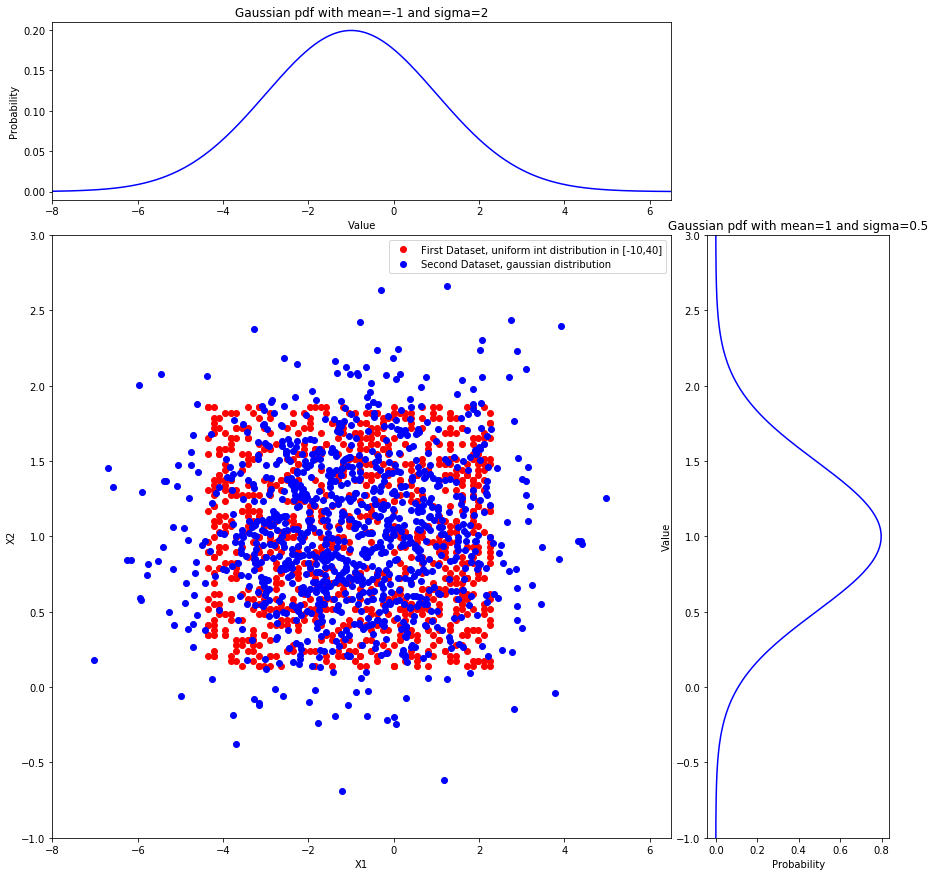

<IPython.core.display.Javascript object>

In [34]:
# fig, ax = plt.subplots()
fig = plt.figure(figsize=(15, 15))

gs = GridSpec(4, 4)

ax_joint = fig.add_subplot(gs[1:4, 0:3])
ax_marg_x = fig.add_subplot(gs[0, 0:3])
ax_marg_y = fig.add_subplot(gs[1:4, 3])

ax_joint.plot(
    D1[0],
    D1[1],
    "ro",
    color="red",
    label="First Dataset, uniform int distribution in [-10,40]",
)
ax_joint.plot(
    D2[0], D2[1], "ro", color="blue", label="Second Dataset, gaussian distribution"
)

ax_marg_x.plot(x_gaussian_1, y_gaussian_1, color="blue")
ax_marg_y.plot(x_gaussian_2, y_gaussian_2, color="blue")

ax_joint.set_ylim(-1, 3)
ax_joint.set_xlim(-8, 6.5)

ax_marg_y.set_ylim(-1, 3)
ax_marg_x.set_xlim(-8, 6.5)


ax_joint.legend()
ax_joint.set_xlabel("X1")
ax_joint.set_ylabel("X2")


ax_marg_x.set_title("Gaussian pdf with mean={} and sigma={}".format(u1, s1))
ax_marg_x.set_xlabel("Value")
ax_marg_x.set_ylabel("Probability")

ax_marg_y.set_title("Gaussian pdf with mean={} and sigma={}".format(u2, s2))
ax_marg_y.set_xlabel("Probability")
ax_marg_y.set_ylabel("Value")
plt.savefig("question2")
plt.show()

## 3/


In [25]:
alpha = 2
beta = 2
N = 20
h = 6

<IPython.core.display.Javascript object>

In [26]:
alpha_distrib_post = h + alpha
beta_distrib_post = N - h + beta
norm_factor_post = gamma(alpha_distrib_post + beta_distrib_post) / (
    gamma(alpha_distrib_post) * gamma(beta_distrib_post)
)

<IPython.core.display.Javascript object>

In [27]:
norm_factor_prior = gamma(alpha + beta) / (gamma(alpha) * gamma(beta))

<IPython.core.display.Javascript object>

In [28]:
def betafunc_posterior(x):
    return (
        norm_factor_post
        * (x ** (alpha_distrib_post - 1))
        * ((1 - x) ** (beta_distrib_post - 1))
    )

<IPython.core.display.Javascript object>

In [29]:
def betafunc_prior(x):
    return norm_factor_prior * (x ** (alpha - 1)) * ((1 - x) ** (beta - 1))

<IPython.core.display.Javascript object>

In [30]:
x = [x / 1000 for x in range(0, 1000)]
posterior = [betafunc_posterior(x / 1000) for x in range(0, 1000)]
prior = [betafunc_prior(x / 1000) for x in range(0, 1000)]

<IPython.core.display.Javascript object>

#### Checking calculation

In [31]:
print("Posterior's integral : {}".format(np.trapz(posterior) / 1000))
print("Prior's integral : {}".format(np.trapz(prior) / 1000))

Posterior's integral : 1.0000000000000002
Prior's integral : 0.999996003


<IPython.core.display.Javascript object>

Ok both integral are equal to 1, which is required for probability distribution functions

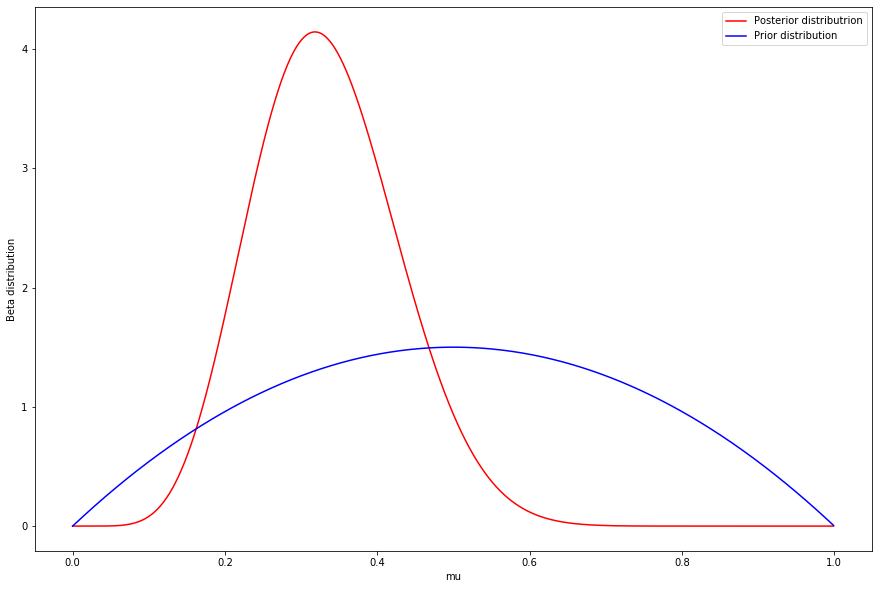

<IPython.core.display.Javascript object>

In [37]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(x, posterior, color="red", label="Posterior distributrion")
ax.plot(x, prior, color="blue", label="Prior distribution")
ax.legend()
plt.xlabel("mu")
plt.ylabel("Beta distribution")
plt.savefig("question3")
plt.show()

Both mean and variance have changed, indeed, they depend on parameters (https://en.wikipedia.org/wiki/Beta_distribution). That's why their shape is different.

The variance is lower hence more precise